*Group-1*

- **Chiara Tramarin** – ID: 2139624  
- **Alessio Tuscano** – ID: 2142876  
- **Antonio Donà** – ID: 2156563  
- **Alberto Schiavinato** – ID: 2130037  

---
## **STRUCTURE OF THE ANALYSIS**  

### **1.The Hopfield Model**  
   - Introduction
   - How Does the Algorithm Work?  
   - Possible Algorithm Optimizations 
   - Network Limitations

### **2. Analysis**  
#### **2.1 Exploratory Phase**  
   - **2D Random Pattern Recognition**  
     - Basic Algorithm  
   - **2D Image Reconstruction**  
     - Basic Algorithm  
     - Monte Carlo Updates & Storkey’s Rule  
     - Increasing Image Resolution to Reduce Pattern Interference  
     - Effect of Different Corruption Levels  

#### **2.2 Grid Search**  
   - **2D Random Patterns**  
     - Overlap vs $ q $ for different $ P $ (fixed $ N $)  
     - Overlap vs $ P $ for different $ N $ (fixed $ q $)  
   - **MNIST Patterns**  
     - Best Update Rule  

#### **2.3 Temperature Study**  
   - **MNIST Patterns**
   - **2D Random Patterns**
     
### **3. Future Work** 
   
---



# The Hopfield Model

## **Introduction**

The **Hopfield model** is a **recurrent neural network** that functions as an **associative memory**. In simple terms, it can retrieve a complete stored pattern (or memory) from a **partial or noisy input**, similar to how a hint can trigger a full recollection in our minds. This behavior is achieved through a network of **binary neurons** whose connections encode the memories.

When the network is provided with **$P$ stored patterns**, it is capable of reconstructing a complete memory from a partial input by identifying and selecting the stored pattern that **most closely matches the incomplete cue**. This mechanism allows the Hopfield model to serve as a **robust content-addressable memory system**.

![Rete](immaginehop2.png)

## **How Does the Algorithm Work?**

The Hopfield model follows **four main phases**:

### **1. Pattern Creation**
A **pattern** is defined as a spin configuration:
$$
x = \{ x_i \mid i=1, \dots, N \}
$$
where each spin $ x_i $ takes values $ \pm1 $, representing, for example, **black (+1) and white (-1) pixels** in an image. Given that each pattern has length $ N $, the network consists of **$ N $ neurons**.

### **2. Training with $ J_{ij} $**
The network learns by computing the **connection matrix** $ J_{ij} $, which encodes the correlation between neurons based on the provided patterns. This is done using **Hebb’s rule**, which strengthens connections between neurons that are activated together. The connection matrix is computed as:  
$$
J_{ij} = \frac{1}{N} \sum_{\mu=1}^{P} \xi^\mu_i \xi^\mu_j
$$
where **$ P $ is the number of stored patterns**, and $ \xi^\mu $ represents the $ \mu $-th pattern.

### **3. Pattern Corruption**
In this phase, a **corrupted version** of each stored pattern is generated. Specifically, for an original pattern $ x^a $, the corrupted pattern $ y^a $ is obtained by modifying each spin $ x^a_i $ independently. Each spin is retained as $ y^a_i = x^a_i  $ with probability  $ q  $ (where  $ q < 1 $), while with probability $ (1 - q) $ it is flipped to $ y^a_i = -x^a_i $. This process **simulates noise or incomplete information**, allowing the network to be tested on its ability to recover the original pattern from a distorted input.

### **4. Pattern Recovery**  
A **corrupted or incomplete pattern** is presented as input. The network iteratively updates its neuron states using the weight matrix $ J_{ij} $, aiming to minimize an **energy function** similar to that of the **Ising model**.  

Each system state is associated with an **energy** given by the **Hamiltonian**:  
$$
H = -\frac{1}{2} \sum_{i,j} J_{ij} S_i S_j
$$
where $ S_i $ represents the state of neuron $ i $. The Hopfield network acts as a **dynamical system**, progressively reducing its energy until it reaches a **stable state** corresponding to the most similar stored pattern.  

The neuron update rule is:  
$$
S_i(t+1) = \text{sgn} \left( \sum_{j=1}^{N} J_{ij} S_j(t) \right)
$$
where $ S_i(t) $ is the state of neuron $ i $ at time $ t $, and the function $ \text{sgn}(x) $ returns $ +1 $ if $ x \geq 0 $ and $ -1 $ otherwise.  

Through successive updates, the network **retrieves the most similar stored pattern** from the given corrupted input, effectively performing memory reconstruction.


### Example: A Simple Hopfield Network

Consider a small network with **4 neurons** and **2 stored patterns**.

#### **Step 1: Define the Patterns**

The two patterns to be stored are:
$$
\xi^1 = (+1, +1, -1, -1) \quad
\xi^2 = (+1, -1, +1, -1)
$$

#### **Step 2: Build the Connection Matrix \( J_{ij} \)**

Using the Hebb rule, the connection between neurons is given by:
$$
J_{ij} = \frac{1}{N} \sum_{\mu=1}^{P} \xi^\mu_i \xi^\mu_j
$$
For example:
- **Between Neuron 1 and Neuron 2:**
  $$
  J_{12} = \frac{1}{4}\left[(1 \cdot 1) + (1 \cdot -1)\right] = \frac{1}{4}(1 - 1) = 0
  $$
- **Between Neuron 1 and Neuron 4:**
  $$
  J_{14} = \frac{1}{4}\left[(1 \cdot -1) + (1 \cdot -1)\right] = -\frac{1}{2}
  $$
A negative value here indicates that these neurons tend to adopt opposite states.

#### **Step 3: Recovering a Pattern from a Corrupted Input**

Suppose the network is given a corrupted pattern:
$$
y = (+1, \ ?, \ -1, \ ?)
$$
Using the update rule:
$$
S_i(t+1) = \text{sgn}\left(\sum_{j=1}^{N} J_{ij} S_j(t)\right)
$$
the network iteratively updates the state of each neuron. The process continues until the network reaches a stable, minimum-energy state that ideally matches one of the stored patterns, thereby reconstructing the missing parts.




## Possible Algorithm Optimizations

The basic algorithm uses the Hebb rule to construct the weight matrix and standard update procedures (synchronous or asynchronous) with the $ \text{sgn}(x) $ function. However, several enhancements can be made to improve performance.

### Alternative Update Strategies for $ S_i(t) $
**Monte Carlo Methods (Metropolis Criterion):**  
Instead of relying solely on the sign rule, neuron states can be updated using a stochastic method such as Monte Carlo sampling with the Metropolis criterion. In this approach, a neuron (or spin) is randomly selected and its potential state change is evaluated. If the energy change of the system $ \Delta E $ is negative, the spin flip is always accepted. When $ \Delta E $ is positive, the flip is accepted with probability  
$$
P(\Delta E) = \exp \left( -\frac{\Delta E}{k_B T} \right),
$$  
where $ T $ is the temperature. This probabilistic acceptance allows the network to explore its state space more thoroughly and effectively minimize the overall energy (Hamiltonian). The temperature can be increased step by step to control the exploration-exploitation trade-off during training. One common strategy is to use a time-dependent function for temperature. For example, the temperature can evolve according to the following forms:

1. Logarithmic form:  
$$
T(t) = \frac{T_0}{1 + \alpha \ln(t + 1)}
$$

2. Polinomial form:  
$$
T(t) = \frac{T_0}{1 + \alpha t}
$$

3. Exponential form:  
$$
T(t) = T_0 \exp(-\alpha t)
$$

In each case, $T_0$ is the initial temperature and $\alpha$ controls the rate of temperature change. These forms allow for different exploration behaviors, with logarithmic cooling generally providing a more gradual reduction in temperature over time.

### Alternative Learning Rules for $ J_{ij} $
- **Modified Hebb Rule (Storkey Learning Rule):**
The standard Hebb rule can be refined by incorporating corrective terms to reduce unwanted correlations. For example, the Storkey Learning Rule modifies the weight matrix as follows:  
$$
J_{ij} = \frac{1}{N} \sum_{\mu=1}^{P} \left( \xi_i^\mu \xi_j^\mu - \frac{1}{N} \sum_{k=1}^{N} \xi_k^\mu \xi_i^\mu \xi_k^\mu \xi_j^\mu \right).
$$  
This additional term subtracts unwanted correlations from similar patterns, preventing overly strong connections and reducing noise, which in turn improves the quality of memory retrieval.
- **Local Interactions:**
Another strategy involves limiting connectivity to local interactions, which is particularly useful when working with image data (e.g., MNIST). Instead of connecting every neuron to all others, connections are restricted to neurons within a certain distance $ R $. The weight matrix is then defined as:  
$$
J_{ij} = \frac{1}{N} \sum_{\mu=1}^{P} \xi_i^\mu \xi_j^\mu \, \Theta(R - d_{ij}),
$$  
where $ \Theta $ is the Heaviside step function and $ d_{ij} $ is the distance between neurons $ i $ and $ j $. This local connectivity approach reduces computational complexity and better captures the spatial correlations inherent in image data, as adjacent pixels tend to exhibit similar characteristics.


## Network Limitations

The performance of a Hopfield network in recovering a pattern from its corrupted version deteriorates as more patterns $ P $ are stored in the weight matrix $ J $.  This challenge arises primarily due to two factors:

1. **Memory Overlap (Interference)**
   - The weight matrix is constructed as the sum of the outer products of the stored patterns:
     $$
     J_{ij} = \frac{1}{N} \sum_{\mu=1}^{P} \xi_i^\mu \xi_j^\mu
     $$
   - As the number of patterns $P $ increases, this summation introduces noise into the values of $ J_{ij} $ because some neurons are activated together in certain patterns but not in others.
   - This results in **interference effects**, where the network may confuse patterns or generate **spurious states**—configurations that do not correspond to any stored pattern but still become dynamic attractors. These spurious states emerge due to the overlap between stored patterns, which introduces noise in the memory retrieval process.  


2. **Network Capacity and Noise**
   - The Hopfield model has an empirical storage capacity. For a system with $ N $ neurons, the maximum number of storable patterns is approximately:
     $$
     P_{\max} \approx 0.138 \, N
     $$
   - When this limit is exceeded, patterns become less distinguishable, leading to chaotic or inaccurate retrieval.
   - Moreover, if the stored patterns are highly dissimilar, the overlap in their connections is low, further diminishing the network's ability to correctly recognize a corrupted pattern compared to scenarios where the patterns share some similarities.
A critical aspect is determining how much overlap between patterns the network can tolerate while still maintaining distinguishability. The objective is to evaluate the network's performance under various conditions of memory storage and noise, ensuring that interference does not significantly compromise pattern recovery.


### References

- Hopfield, J. J. (1982). *Neural networks and physical systems with emergent collective computational abilities*. Proceedings of the National Academy of Sciences, 79(8), 2554-2558.  
- Amit, D. J., Gutfreund, H., & Sompolinsky, H. (1987). *Statistical mechanics of neural networks near saturation*. Annals of Physics, 173(1), 30-67.  
- Tsodyks, M. V., & Feigel’man, M. V. (1988). *The enhanced storage capacity in neural networks with low activity level*. Europhysics Letters, 6(2), 101-105.  


---
# **Analysis**  
## Exploratory Phase
We decided to conduct an analysis in two stages. In the first phase, we explored whether our implemented Hopfield model was functioning correctly. This involved performing preliminary tests, identifying potential issues, and gaining an intuitive understanding of the model’s behavior.  

After this qualitative exploratory phase, we moved on to a more detailed and quantitative study. Specifically, we conducted a grid search on two specific datasets to systematically investigate the limitations we observed in the initial tests.  

---

In [1]:
# main class and pattern helpers import, more info in each respective file
from HopfieldModel import HopfieldModelnD
from patterns import generate_random_patterns, corrupt_patterns
from patterns import get_mnist_patterns, get_images_patterns
from helpers import grid_search_parallel, plot_all_results, plot_mnist_results


# other imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

---

### **2D Random Pattern Recognition**  
#### Basic Algorithm
We began our analysis by testing how well the Hopfield network recognizes random 2D patterns using a basic implementation. In this setup, we used:  

- The Hebbian learning rule to define the synaptic matrix $ J_{ij} $ 
- Synchronous updates with the sign rule  

To test the robustness of the model, we introduced a high corruption level of $ q = 0.7 $ (where noise is defined as $ 1 - q $). With $ N = 10 \times 10 $ and $ P = 5 $ stored patterns, we observed that the overlap between the reconstructed and original images remained high, indicating that the model performed well under these conditions.  

---




Converged after 2 iterations
Converged after 4 iterations
Converged after 2 iterations
Converged after 3 iterations
Converged after 3 iterations


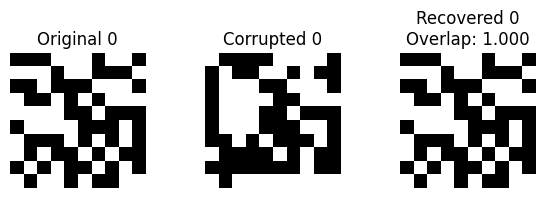

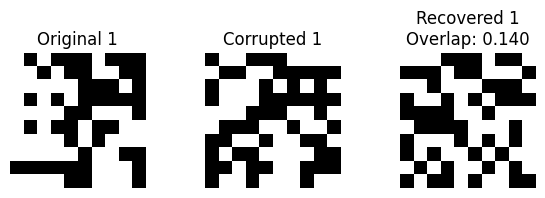

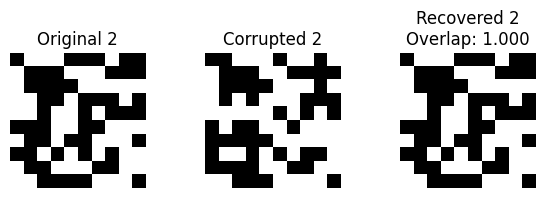

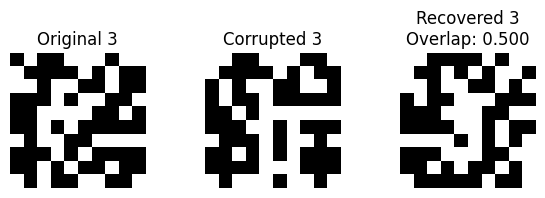

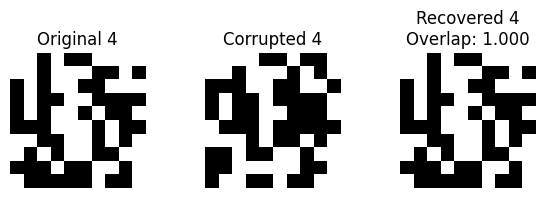

In [5]:
# first we generate the patterns:
shape = (10,10)
n_patterns = 5
patterns = generate_random_patterns(shape, n_patterns)

# corrupting with a noise level of 1-q
q = 0.7
corrupted = corrupt_patterns(patterns, q)

# generating the HopfieldModel and correcting the corrupted patterns
model = HopfieldModelnD(patterns, update_method='synchronous', learning_rule='hebb', verbose=True)
recovered = model.correct_patterns(corrupted, temperature=0.1, alpha=1) #here if we do not select montecarlo temperature and alpha means nothing

# Assuming 'patterns', 'corrupted', 'recovered' are defined and 'model' is your Hopfield model.
plot_all_results(patterns, corrupted, recovered, filepath='plots/random_2d_example.png', model=model, figsize=(6,2))


---

### **2D Image Reconstruction**  
#### Basic Algorithm
To further evaluate the model qualitatively, we tested its ability to reconstruct structured patterns generated from actual images. Unlike random patterns, these structured patterns provide a more intuitive way to assess how well the network retrieves stored information.  

We used the standard Hebbian learning rule with $ P = 5 $ patterns of size $ 80 \times 80 $ and applied a higher corruption level of $ q = 0.75 $. The plots reveal that, under these conditions, the network struggles to reconstruct the images correctly, often converging to spurious energy states.  

As expected from theoretical results, when the number of stored patterns increases, interference effects become significant. This interference prevents the network from accurately retrieving the original images, highlighting a fundamental limitation of the Hopfield model.  

Here we also observe that the network has much more difficulty recovering images compared to random patterns. This is because real images have structured correlations—neighboring pixels are often similar—whereas random patterns are uncorrelated. As a result, the stored images tend to interfere with each other more, making retrieval less accurate. Additionally, since images contain repetitive features and large uniform regions, the network is more likely to fall into spurious minima, struggling to reconstruct the correct pattern

---



Converged after 3 iterations
Converged after 3 iterations
Converged after 2 iterations
Converged after 3 iterations
Converged after 3 iterations


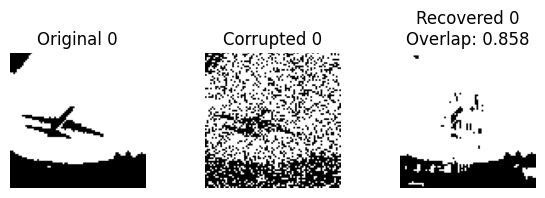

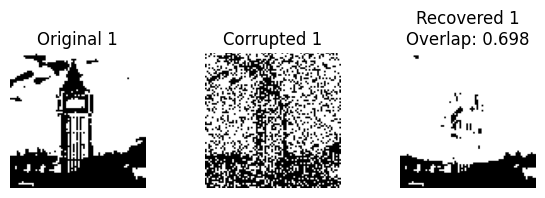

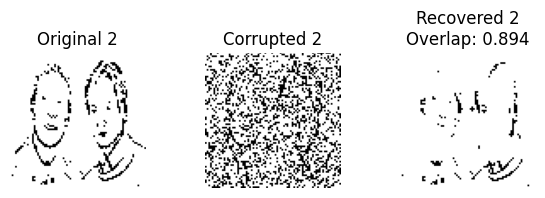

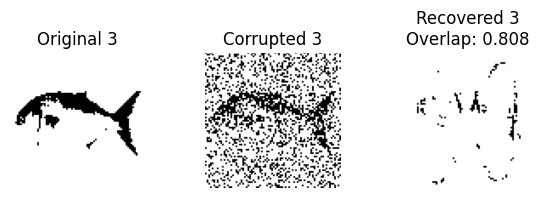

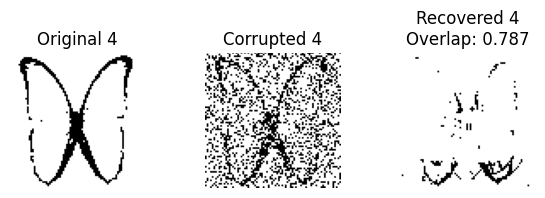

Interference for resolution (80, 80): 0.401375


In [3]:
# first we generate the patterns:
shape = (80,80)
n_patterns = 5
patterns = get_images_patterns(max_images = n_patterns, size = shape)

# corrupting with a noise level of 1-q
q = 0.75
corrupted = corrupt_patterns(patterns, q)

# generating the HopfieldModel and correcting the corrupted patterns
model = HopfieldModelnD(patterns, update_method='synchronous', learning_rule='hebb', 
                        R=3, verbose=True)
recovered = model.correct_patterns(corrupted, temperature=1e-3, alpha=1e-5, 
                                   schedule = 'logarithmic', max_iter=300) #here if we do not select montecarlo temperature and alpha means nothing

# Assuming 'patterns', 'corrupted', 'recovered' are defined and 'model' is your Hopfield model.
plot_all_results(patterns, corrupted, recovered, model=model, filepath='plots/images_80x80_example.png',figsize=(6,2))
print(f'Interference for resolution {shape}: {model.memory_interference()}')

---
#### Monte Carlo Updates and Storkey's Rule 
To enhance the performance of our algorithm, we introduced two key modifications:  

- **Monte Carlo updates** instead of synchronous updates  
- **Storkey’s learning rule** for computing the synaptic matrix $ J_{ij} $ 

Storkey’s rule takes into account the similarity between stored patterns, leading to more refined connection weights. As a result, we observed a significant improvement in the overlap between the reconstructed and original images. The network no longer falls into spurious minima; however, some images are still misclassified due to convergence to incorrect local minima.  

For example, in one case, the image of two faces was incorrectly retrieved as a butterfly. This misclassification is likely due to the structural similarity between the two patterns—both contain large white regions in the center with dark contours in similar positions.  

---

Converged after 9 iterations
Converged after 9 iterations
Converged after 11 iterations
Converged after 9 iterations
Converged after 9 iterations


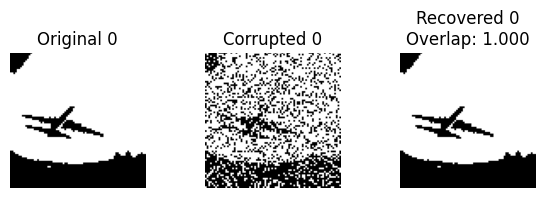

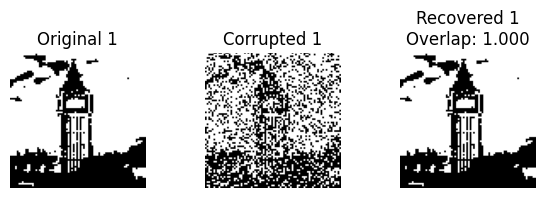

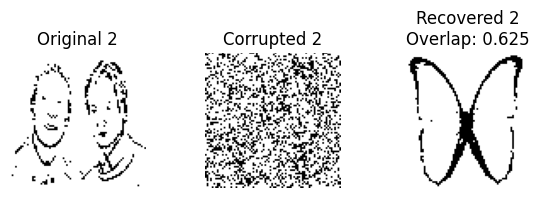

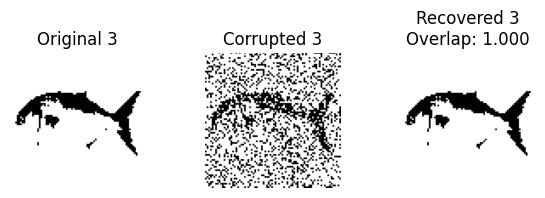

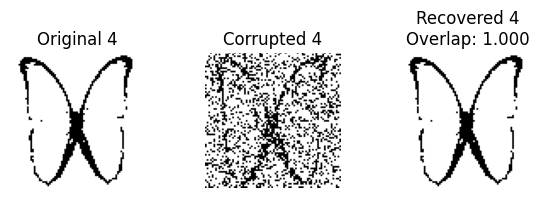

Interference for resolution (80, 80): 0.401375


In [4]:
# first we generate the patterns:
shape = (80,80)
n_patterns = 5
patterns = get_images_patterns(max_images = n_patterns, size = shape)

# corrupting with a noise level of 1-q
q = 0.75
corrupted = corrupt_patterns(patterns, q)

# generating the HopfieldModel and correcting the corrupted patterns
model = HopfieldModelnD(patterns, update_method='montecarlo', learning_rule='turkey', 
                        R=3, verbose=True)
recovered = model.correct_patterns(corrupted, temperature=1e-3, alpha=1e-5, 
                                   schedule = 'logarithmic', max_iter=300) #here if we do not select montecarlo temperature and alpha means nothing

# Assuming 'patterns', 'corrupted', 'recovered' are defined and 'model' is your Hopfield model.
plot_all_results(patterns, corrupted, recovered, model=model, filepath='plots/images_80x80_example.png',figsize=(6,2))
print(f'Interference for resolution {shape}: {model.memory_interference()}')

---
#### Increasing Image Resolution to Reduce Pattern Interference

Next, we investigated whether increasing the resolution of our five stored images could help the network better distinguish between them. Our hypothesis was that a higher number of pixels might reduce the risk of pattern confusion.  

Indeed, we observed a further improvement: the network was now able to correctly retrieve all stored images. However, we believe this improvement is not solely due to the increased resolution in relation to the network’s storage capacity. For instance, considering the previous images of $28 \times 28 = 784 $ pixels, the storage limit—approximately $117$—is well above our five stored patterns. Therefore, increasing the resolution should not significantly impact this aspect.  

Instead, we believe the improvement is more likely a consequence of reduced pattern correlation. By increasing resolution, similar patterns become more distinct, making them easier to differentiate. This effect became particularly evident when moving from $ 80 \times 80 $ to $ 120 \times 120 $, where all five images were recognized correctly. This result aligns with theoretical predictions regarding the linear relationship between  P and  N.

---

Converged after 10 iterations
Converged after 9 iterations
Converged after 9 iterations
Converged after 8 iterations
Converged after 10 iterations


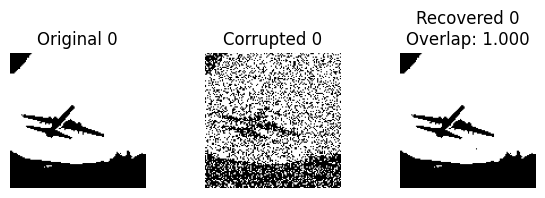

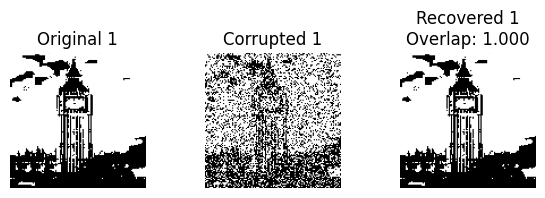

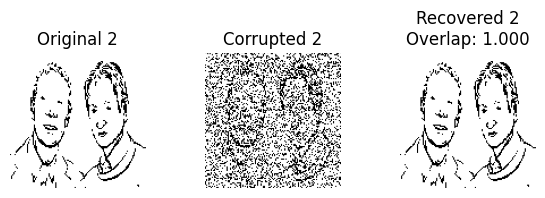

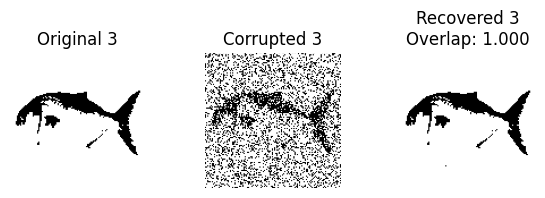

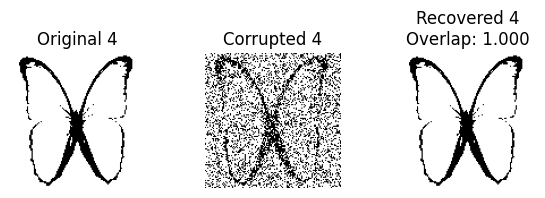

Interference for resolution (120, 120): 0.3985833333333333


In [5]:
# first we generate the patterns:
shape = (120,120)
n_patterns = 5
patterns = get_images_patterns(max_images = n_patterns, size = shape)

# corrupting with a noise level of 1-q
q = 0.75
corrupted = corrupt_patterns(patterns, q)

# generating the HopfieldModel and correcting the corrupted patterns
model = HopfieldModelnD(patterns, update_method='montecarlo', learning_rule='turkey', 
                        R=3, verbose=True)
recovered = model.correct_patterns(corrupted, temperature=1e-3, alpha=1e-5, 
                                   schedule = 'logarithmic', max_iter=300) #here if we do not select montecarlo temperature and alpha means nothing

# Assuming 'patterns', 'corrupted', 'recovered' are defined and 'model' is your Hopfield model.
plot_all_results(patterns, corrupted, recovered, filepath='plots/images_120x120_example.png',model=model,figsize=(6,2))
print(f'Interference for resolution {shape}: {model.memory_interference()}')

---

#### Effect of Different Corruption Levels 
Continuing with our exploratory analysis, we examined how the network responds to different types and levels of corruption. We applied the best-performing method from our previous experiments—Monte Carlo updates with Storkey’s rule—and tested it under a lower corruption level of $q = 0.1 $.  

---


Converged after 9 iterations
Converged after 8 iterations
Converged after 7 iterations
Converged after 10 iterations


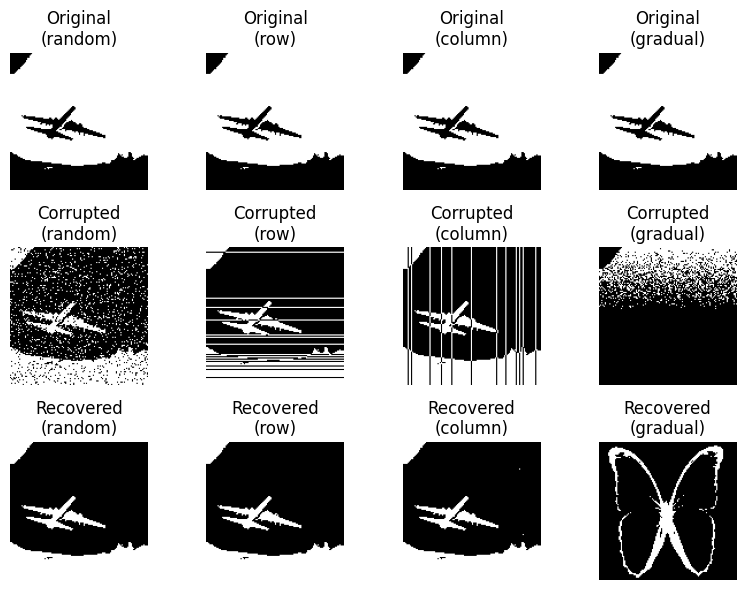

In [6]:
# Let's assume that the functions get_images_patterns, corrupt_patterns, 
# and the HopfieldModelnD class are already defined.
n_patterns = 5
patterns = get_images_patterns(max_images=n_patterns, size=shape)
original_img = patterns[0]

# Corruption parameter
q = 0.1

# List of methods to test
methods = ["random", "row", "column", "gradual"]

# For "gradual," we also specify the direction and width_fraction
kwargs_gradual = {"direction": "vertical", "width_fraction": 0.7}

# Create a dictionary to store the results
corrupted_dict = {}
recovered_dict = {}

# Create the model (for example, with the learning rule 'turkey')
model = HopfieldModelnD(patterns, update_method='montecarlo', learning_rule='turkey', R=3, verbose=True)

for method in methods:
    if method == "gradual":
        corrupted = corrupt_patterns([original_img], q, method=method, **kwargs_gradual)[0]
    else:
        corrupted = corrupt_patterns([original_img], q, method=method)[0]
    corrupted_dict[method] = corrupted
    recovered = model.correct(corrupted, max_iter=300, temperature=1e-3, alpha=1e-5, schedule='logarithmic')
    # Reminder: if the model returns a flattened vector, reshape it:
    recovered = recovered.reshape(original_img.shape)
    recovered_dict[method] = recovered

# Now plot a grid: 3 rows (Original, Corrupted, Recovered) and 4 columns (methods)
import matplotlib.pyplot as plt

n_methods = len(methods)
fig, axes = plt.subplots(3, n_methods, figsize=(2*n_methods, 6))
for j, method in enumerate(methods):
    axes[0, j].imshow(original_img, cmap='gray')
    axes[0, j].set_title(f"Original\n({method})")
    axes[0, j].axis("off")
    
    axes[1, j].imshow(corrupted_dict[method], cmap='gray')
    axes[1, j].set_title(f"Corrupted\n({method})")
    axes[1, j].axis("off")
    
    axes[2, j].imshow(recovered_dict[method], cmap='gray')
    axes[2, j].set_title(f"Recovered\n({method})")
    axes[2, j].axis("off")
plt.tight_layout()
plt.savefig('plots/images_corruption_q10.png')
plt.show()

Here, we observe that different levels and types of pattern corruption lead to distinct outcomes. In the first three cases, the pattern is reconstructed negatively.

In the fourth case, where the corruption is gradual and affects a specific region of the image (the lower part), the pattern instead converges to an incorrect absolute minimum due to similarity. This suggests that the network is more likely to recover a corrupted pattern when the noise is distributed across non-adjacent pixels rather than concentrated in a specific area.

---
## Grid Search
### 2D Random Patterns 
#### Overlap vs $q$ for different $P$ (fixed $N$)

Now, we focus on a more systematic analysis of the energy landscape, varying the different parameters. To achieve this, we developed a flexible function to explore all possible configurations, and we obtained several results to present. First, we examine the capability of the network to retrive the patterns by fixing the size of the Hopfield network and varying $ q $ (the corruption level) and the number of stored patterns $P$.  

Next, we calculate the average overlap between the retrieved patterns and the original patterns, and we also compute the standard deviation. This allows us to plot a heatmap based on the two explored dimensions. Finally, we generate a plot to assess the network's performance over a range of fixed $ q $ values.

---

In [7]:
# Example: load patterns
#patterns = get_images_patterns(directory="images_patterns", max_images=5, threshold=128, size=(80, 80))
#patterns = get_mnist_patterns(scale = 1)


# Define the parameter grid.
param_grid = {
    'q': 0.6,#np.linspace(0, 1, 101),             # corruption levels
    'n_patterns': np.arange(3,40,1),          # use number of patterns already loaded or do a np.linspace if you generate internally (only random)
    'dim': [(14,14)],               # dimension must match the provided patterns
    'T': 1e-1,
    'alpha': 1e-4,
    'schedule': ['exponential'],
    'R': None,
    'update_method': ['montecarlo'],
    'learning_rule': ['hebb']
}

# Execute grid search, passing the pre-loaded patterns.
df_results, best_model_params = grid_search_parallel(
    param_grid,
    save_path=None,
    best_metric_key='avg_overlap',
    n_jobs=10,
    #patterns=patterns  # Pass the external patterns
    # You can also pass a custom corruption function: corruption_function=your_custom_function
)

Grid Search Progress: 100%|█████████████████████| 37/37 [00:06<00:00,  5.70it/s]


---
For the sake of efficiency, we skipped the grid search above and instead loaded the precomputed results from a CSV file to plot the data. However, if you prefer, you can run the full grid search yourself and pass the results directly. You will see that the data is essentially the same

---

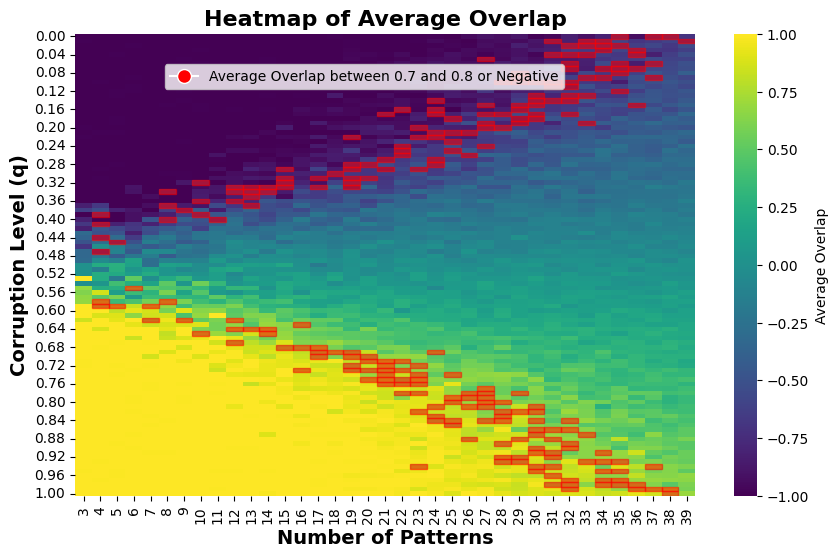

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D 
# Load the grid search results
df = pd.read_csv("grid_search_results/grid_search_results_q_n_patterns.csv")

# Create the pivot matrix for the heatmap
heatmap_data = df.pivot(index='q', columns='n_patterns', values='avg_overlap')

# Set the y-axis levels with two decimal places
heatmap_data.index = [f"{q:.2f}" for q in heatmap_data.index]
plt.figure(figsize=(10, 6))

cmap = sns.color_palette("viridis", as_cmap=True)

# Create the heatmap
ax = sns.heatmap(heatmap_data.astype(float), cmap=cmap, cbar_kws={'label': 'Average Overlap'})

# Create a mask for avg_overlap values between 0.7 and 0.8 and also for negative values
mask = (heatmap_data >= 0.7) & (heatmap_data <= 0.8) | (heatmap_data <= -0.7) & (heatmap_data >= -0.8)

# For each cell between 0.7 and 0.8 or between -0.7 and -0.8, change the color to red
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        if mask.iloc[i, j]:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color='red', alpha=0.5))

plt.xlabel("Number of Patterns", fontsize=14, fontweight='bold')
plt.ylabel("Corruption Level (q)", fontsize=14, fontweight='bold')
plt.title("Heatmap of Average Overlap", fontsize=16, fontweight='bold')

#legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Average Overlap between 0.7 and 0.8 or Negative')]
plt.legend(handles=legend_elements, loc='upper right', fontsize=10, bbox_to_anchor=(0.8, 0.95))
plt.grid(False)
plt.savefig('plots/overlap_n_patterns.png')
plt.show()

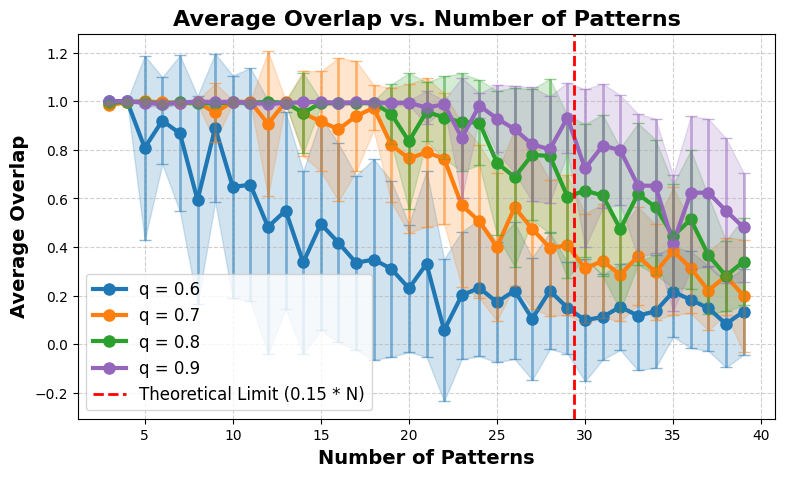

In [3]:
# Load the grid search results
df = pd.read_csv("grid_search_results/grid_search_results_q_n_patterns.csv")


q_values_to_plot = [0.6, 0.71, 0.8, 0.9]

# Extract the maximum number of patterns tested
max_n_patterns = 40

color_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#9467bd"] # Blue, orange, green, red, purple


plt.figure(figsize=(9, 5))

for i, q_val in enumerate(q_values_to_plot):
    subset = df[df['q'] == q_val].sort_values(by='n_patterns')
    
    color = color_palette[i]
    
      # Line with larger and thicker points
    plt.plot(subset['n_patterns'], subset['avg_overlap'], marker='o', markersize=8, 
             linestyle='-', linewidth=3, label=f"q = {q_val:.1f}", color=color, alpha=1)
    

    # Error bars with the same color but more transparent
    plt.errorbar(subset['n_patterns'], subset['avg_overlap'], yerr=subset['std_overlap'], 
                 fmt='o', capsize=4, elinewidth=2, alpha=0.5, color=color)

    # Add an area under the curve with the same color but transparent
    plt.fill_between(subset['n_patterns'], 
                     subset['avg_overlap'] - subset['std_overlap'], 
                     subset['avg_overlap'] + subset['std_overlap'], 
                     color=color, alpha=0.2)

# Add the vertical line for the theoretical limit
theoretical_limit = 0.15 * 14 * 14
plt.axvline(x=theoretical_limit, color='red', linestyle='--', linewidth=2, label="Theoretical Limit (0.15 * N)")

plt.xlabel("Number of Patterns", fontsize=14, fontweight='bold')
plt.ylabel("Average Overlap", fontsize=14, fontweight='bold')
plt.title("Average Overlap vs. Number of Patterns", fontsize=16, fontweight='bold')
plt.legend(loc='lower left', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

---

Here, the average overlap is computed over all stored patterns for a given value of $q$, with the error estimated as the standard deviation. To ensure physical consistency, we clamp the error bars so that they do not exceed 1 or fall below -1. Since an overlap of 1 represents a perfect match, values beyond this range are not physically meaningful. Clamping the error bars ensures that the reported uncertainty remains within the valid bounds of the overlap measure. Below, we present the corrected graph with these adjustments applied.

---

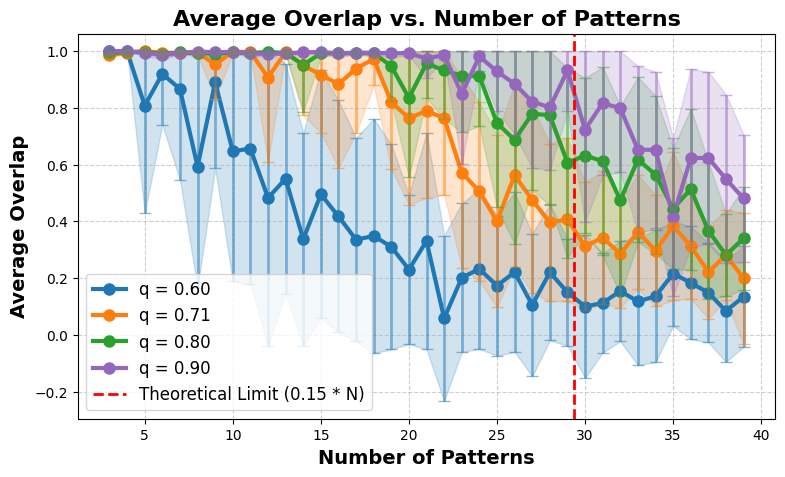

In [7]:
# Load the grid search results CSV file
df = pd.read_csv("grid_search_results/grid_search_results_q_n_patterns.csv")

# Define the q values to plot and color palette
q_values_to_plot = [0.6, 0.71, 0.8, 0.9]
color_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#9467bd"]  # Blue, orange, green, purple

plt.figure(figsize=(9, 5))

for i, q_val in enumerate(q_values_to_plot):
    # Select and sort data for a specific q value
    subset = df[df['q'] == q_val].sort_values(by='n_patterns')
    
    # Extract x (number of patterns), y (average overlap) and error (std overlap)
    x = subset['n_patterns'].values
    y = subset['avg_overlap'].values
    e = subset['std_overlap'].values
    
    # Compute the lower and upper bounds of the error BEFORE clamping
    y_lower = y - e
    y_upper = y + e
    
    # Clamp the lower and upper bounds to [-1, 1]
    y_lower_clamped = np.maximum(y_lower, -1)
    y_upper_clamped = np.minimum(y_upper, 1)
    
    # For error bars, compute the error distances below and above the mean
    e_lower = y - y_lower_clamped
    e_upper = y_upper_clamped - y
    yerr = np.array([e_lower, e_upper])
    
    # Choose the color for the current q value
    color = color_palette[i]
    
    # Plot the main line with markers
    plt.plot(x, y, marker='o', markersize=8, linestyle='-', linewidth=3,
             label=f"q = {q_val:.2f}", color=color, alpha=1)
    
    # Plot the error bars using the clamped error values
    plt.errorbar(x, y, yerr=yerr, fmt='o', capsize=4, elinewidth=2,
                 alpha=0.5, color=color)
    
    # Fill the area between the clamped lower and upper error bounds
    plt.fill_between(x, y_lower_clamped, y_upper_clamped, color=color, alpha=0.2)

# Plot a vertical line representing the theoretical limit
theoretical_limit = 0.15 * 14 * 14
plt.axvline(x=theoretical_limit, color='red', linestyle='--', linewidth=2, label="Theoretical Limit (0.15 * N)")

# Set labels, title, legend, and grid
plt.xlabel("Number of Patterns", fontsize=14, fontweight='bold')
plt.ylabel("Average Overlap", fontsize=14, fontweight='bold')
plt.title("Average Overlap vs. Number of Patterns", fontsize=16, fontweight='bold')
plt.legend(loc='lower left', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('plots/avg_overlap_error1_limit.png')

plt.show()


---

Here, we observe that, as expected from theory, as the number of stored patterns increases, the network struggles more to correctly retrieve them. Additionally, the greater the corruption, the more quickly the network's performance deteriorates.  

We also notice that for a corruption level of $ q = 0.9 $, the maximum storage capacity rule is satisfied. Given a dataset of size $ N \times N $ with $ N = 14 $, the theoretical storage capacity is approximately $ 0.138 \times N^2 $, which results in about 27 patterns. Indeed, we see that for the purple line at 27 patterns, the overlap is very close to 1. Naturally, this behavior becomes more challenging to maintain for higher levels of corruption (blue, green, and orange lines).


---

#### Overlap vs $P$ for different $N$ (fixed $q$)

Now, we will test the overlap, but this time by fixing $q$ and varying the size of the Hopfield network. The results from this search should confirm the conclusions we obtained earlier, as we expected.


Here we have fixed the $q$ and we have explored how the recovery changes varing the number of patterns $P$ and and the dimension of the pattern $N$ ( i.e. the number of pixels)

---

In [8]:
# Example: load patterns from a folder of images (questa funzione la definisci tu, come già fatto)
#patterns = get_images_patterns(directory="images_patterns", max_images=5, threshold=128, size=(80, 80))
#patterns = get_mnist_patterns(scale = 1)


# Define the parameter grid.
param_grid = {
    'q': 0.75,#np.linspace(0, 1, 101),             # corruption levels
    'n_patterns': 1,#np.arange(4,140,1),          # use number of patterns already loaded or do a np.linspace if you generate internally (only random)
    'dim': 2,#[(x,x) for x in np.arange(6,30,1)],               # dimension must match the provided patterns
    'T': None,
    'alpha': None,
    'schedule': None,
    'R': None,
    'update_method': ['synchronous'],
    'learning_rule': ['turkey']
}

# Execute grid search, passing the pre-loaded patterns.
df_results, best_model_params = grid_search_parallel(
    param_grid,
    save_path=None,
    best_metric_key='avg_overlap',
    n_jobs=10,
    #patterns=patterns  # Pass the external patterns
    # You can also pass a custom corruption function: corruption_function=your_custom_function
)

Grid Search Progress: 100%|██████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.87s/it]


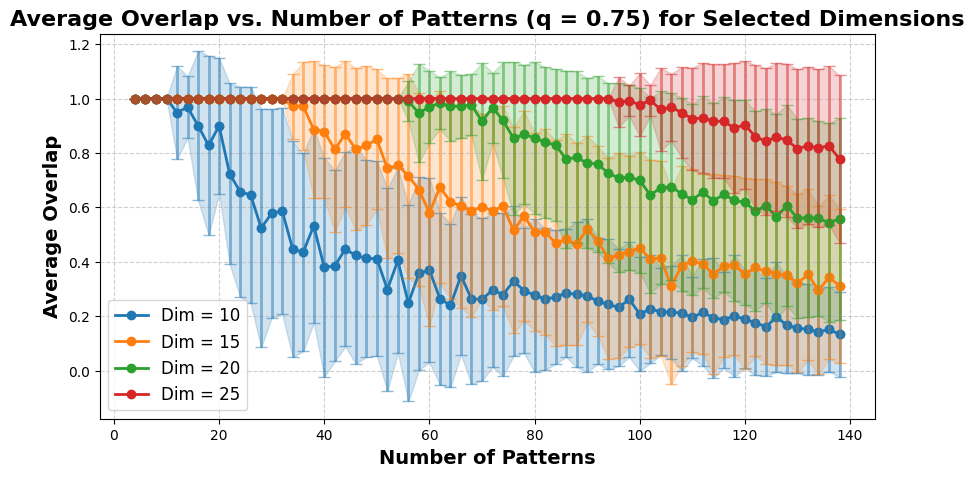

In [5]:
import re

# Load the dataset
df = pd.read_csv("grid_search_results/random_grid_search_all_q75_3.csv")

# Filter only data with q = 0.75
df = df[df['q'] == 0.75].copy()


# Function to extract the first value of the tuple in the "dim" column
def extract_dim(value):
    value = str(value)  # Convert everything to string
    # Search for the part that looks like a tuple (dim, dim)
    match = re.match(r'\((\d+),\s*(\d+)\)', value)  
    if match:
        return int(match.group(1))  # Return the first number of the tuple
    else:
        return np.nan  # If no tuple is found, return NaN

# Apply the function to the dimension column
df['dim'] = df['dim'].apply(extract_dim)

# Remove any NaN values
df = df.dropna(subset=['dim'])

# Select only dimensions from 6 to 34 that are multiples of 5
dimension_values = [d for d in df['dim'].unique() if d % 5 == 0 and 6 <= d <= 34]
dimension_values.sort()  # Ordina le dimensioni


color_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Blu, arancione, verde, rosso, viola


plt.figure(figsize=(10, 5))

for i, dim in enumerate(dimension_values):  
    subset = df[df['dim'] == dim].sort_values(by='n_patterns')
    
    # Reset dell'indice per evitare problemi di disallineamento
    subset = subset.reset_index(drop=True)
    
    color = color_palette[i % len(color_palette)]  
    
    plt.plot(subset['n_patterns'], subset['avg_overlap'], marker='o', markersize=6, 
             linestyle='-', linewidth=2, label=f"Dim = {dim}", color=color, alpha=1)
    
    plt.errorbar(subset['n_patterns'], subset['avg_overlap'], yerr=subset['std_overlap'], 
                 fmt='o', capsize=4, elinewidth=2, alpha=0.5, color=color)

    plt.fill_between(subset['n_patterns'], 
                     subset['avg_overlap'] - subset['std_overlap'], 
                     subset['avg_overlap'] + subset['std_overlap'], 
                     color=color, alpha=0.2)
    



plt.xlabel("Number of Patterns", fontsize=14, fontweight='bold')
plt.ylabel("Average Overlap", fontsize=14, fontweight='bold')
plt.title("Average Overlap vs. Number of Patterns (q = 0.75) for Selected Dimensions", fontsize=16, fontweight='bold')
plt.legend(loc='lower left', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('plots/avg_overlap_error.png')

plt.show()

Here too, as above, we present the graph with the errors clamped below.

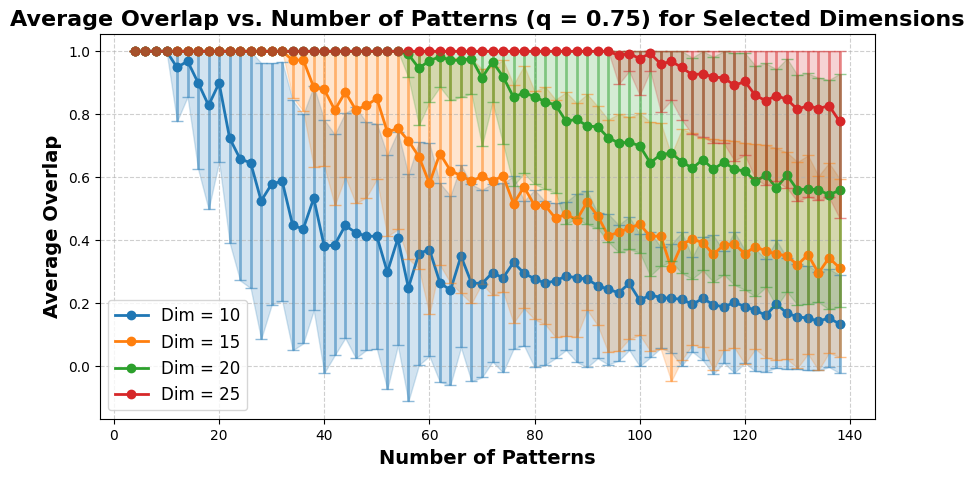

In [8]:
import re

# Load the dataset
df = pd.read_csv("grid_search_results/random_grid_search_all_q75_3.csv")

# Filter only data with q = 0.75
df = df[df['q'] == 0.75].copy()

# Function to extract the first value of the tuple in the "dim" column
def extract_dim(value):
    value = str(value)  # Convert the value to a string
    # Search for the part that looks like a tuple (dim, dim)
    match = re.match(r'\((\d+),\s*(\d+)\)', value)
    if match:
        return int(match.group(1))  # Return the first number of the tuple
    else:
        return np.nan  # Return NaN if no tuple is found

# Apply the function to the "dim" column
df['dim'] = df['dim'].apply(extract_dim)

# Remove any rows with NaN in the "dim" column
df = df.dropna(subset=['dim'])

# Select only dimensions from 6 to 34 that are multiples of 5
dimension_values = [d for d in df['dim'].unique() if d % 5 == 0 and 6 <= d <= 34]
dimension_values.sort()  # Sort dimensions in ascending order

# Define a color palette
color_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Blue, orange, green, red, purple

plt.figure(figsize=(10, 5))

for i, dim in enumerate(dimension_values):
    # Filter and sort the subset for each dimension
    subset = df[df['dim'] == dim].sort_values(by='n_patterns').reset_index(drop=True)
    
    # Extract x (number of patterns), y (average overlap), and error (std_overlap)
    x = subset['n_patterns'].values
    y = subset['avg_overlap'].values
    e = subset['std_overlap'].values
    
    # Compute the lower and upper bounds of the error BEFORE clamping
    y_lower = y - e
    y_upper = y + e
    
    # Clamp the lower and upper bounds to [-1, 1]
    y_lower_clamped = np.maximum(y_lower, -1)
    y_upper_clamped = np.minimum(y_upper, 1)
    
    # Calculate the error distances after clamping (for errorbar)
    e_lower = y - y_lower_clamped
    e_upper = y_upper_clamped - y
    yerr = np.array([e_lower, e_upper])
    
    # Choose a color from the palette
    color = color_palette[i % len(color_palette)]
    
    # Plot the main line with markers
    plt.plot(x, y, marker='o', markersize=6, linestyle='-', linewidth=2,
             label=f"Dim = {dim}", color=color, alpha=1)
    
    # Plot error bars with the clamped error values
    plt.errorbar(x, y, yerr=yerr, fmt='o', capsize=4, elinewidth=2,
                 alpha=0.5, color=color)
    
    # Fill the area between the clamped lower and upper bounds
    plt.fill_between(x, y_lower_clamped, y_upper_clamped, color=color, alpha=0.2)

# Set the plot labels, title, legend, and grid
plt.xlabel("Number of Patterns", fontsize=14, fontweight='bold')
plt.ylabel("Average Overlap", fontsize=14, fontweight='bold')
plt.title("Average Overlap vs. Number of Patterns (q = 0.75) for Selected Dimensions", fontsize=16, fontweight='bold')
plt.legend(loc='lower left', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Save the plot as a PNG file
plt.savefig('plots/avg_overlap_error_lim.png')
plt.show()


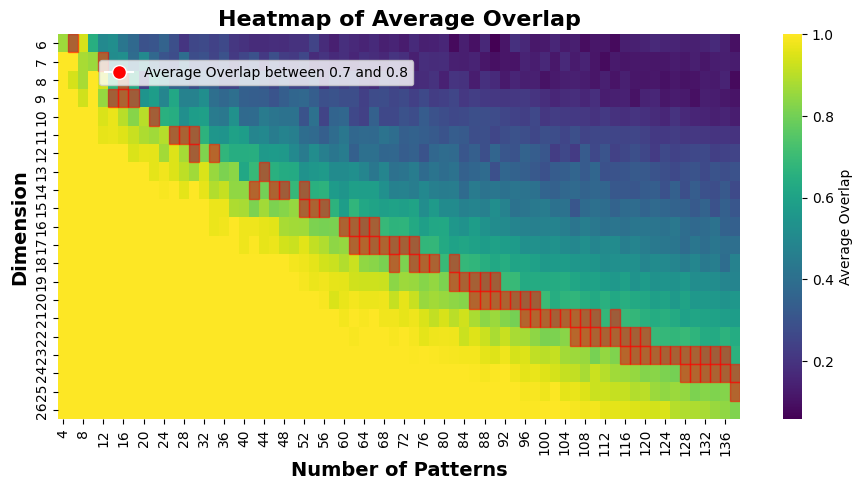

In [10]:
from matplotlib.lines import Line2D 

# Load the dataset with the new data
df = pd.read_csv("grid_search_results/random_grid_search_all_q75_3.csv")

# Load the dataset with the new data
df = df[df['q'] == 0.75].copy()

# Apply the function to extract the dimension from the 'dim' column (assuming it's a tuple)
def extract_dim(value):
    value = str(value)   #Convert everything to a string
    # Search for a pattern that looks like a tuple (dim, dim)
    match = re.match(r'\((\d+),\s*(\d+)\)', value)  
    if match:
        return int(match.group(1))   # Return the first number of the tuple
    else:
        return np.nan   #If no tuple is found, return NaN

# Apply the function to the dimension column
df['dim'] = df['dim'].apply(extract_dim)

# Remove any NaN values
df = df.dropna(subset=['dim'])

# Create the pivot matrix for the heatmap (dim, n_patterns) -> avg_overlap
heatmap_data = df.pivot(index='dim', columns='n_patterns', values='avg_overlap')

# Set the y-axis levels with two decimal places
heatmap_data.index = [f"{d}" for d in heatmap_data.index]


plt.figure(figsize=(11, 5))

# Create the heatmap 
ax = sns.heatmap(heatmap_data.astype(float), cmap='viridis', cbar_kws={'label': 'Average Overlap'})

# Customize the coloring of avg_overlap between 0.7 and 0.8 in red
# Generate a mask for values between 0.7 and 0.8
mask = (heatmap_data >= 0.7) & (heatmap_data <= 0.8)

# For each cell between 0.7 and 0.8, change the color to red
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        if mask.iloc[i, j]:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color='red', alpha=0.5))


plt.xlabel("Number of Patterns", fontsize=14, fontweight='bold')
plt.ylabel("Dimension", fontsize=14, fontweight='bold')
plt.title("Heatmap of Average Overlap", fontsize=16, fontweight='bold')

#legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Average Overlap between 0.7 and 0.8')]
plt.legend(handles=legend_elements, loc='upper left', fontsize=10, bbox_to_anchor=(0.05, 0.95))
plt.grid(False)
plt.show()

Here, we observe that, in accordance with the maximum storage capacity rule, by increasing 
𝑁, I am able to store more patterns effective


---

### **MNIST Patterns**  
#### **Best Update Rule**  

In this section, we focus on the MNIST dataset, which consists of 10 digits represented as 28×28 pixel images (converted into patterns). These images exhibit strong correlations, particularly between certain digits (e.g., 3 and 8), making memory retrieval challenging for models like the Hopfield network.  

To evaluate the network's performance, we conduct a **grid search** over different update methods—**synchronous, asynchronous, and Monte Carlo**—and learning rules—**Storkey, Hebbian, and local**—while also varying some additional parameters (as commented in the code). This allows us to determine which combination provides the best retrieval accuracy by analyzing the overlap indicator. The goal is to understand how different implementations of the update rule influence the network’s ability to reduce interference and correctly recall stored patterns.  

---

In [11]:
#patterns = get_images_patterns(directory="images_patterns", max_images=5, threshold=128, size=(80, 80))
patterns = get_mnist_patterns(scale = 1)


# Define the parameter grid.
param_grid = {
    'q': 0.6,#np.linspace(0, 1, 101),             # corruption levels
    'n_patterns': [len(patterns)],          # use number of patterns already loaded or do a np.linspace if you generate internally (only random)
    'dim': [patterns[0].shape],               # dimension must match the provided patterns
    'T': 1e-1,#[1e-1,1e-2,1e-3,1e-4,1e-5],
    'alpha': 1e-4,#[1e-2,1e-3,1e-4,1e-5,1e-6,1e-7],
    'schedule': ['exponential'],
    'R': 4,#[1,2,3,4,5,6,7],
    'update_method': ['synchronous','asynchronous','montecarlo'],
    'learning_rule': ['turkey','hebb','local']
}

# Execute grid search, passing the pre-loaded patterns.
df_results, best_model_params = grid_search_parallel(
    param_grid,
    save_path=None,#'grid_search_results/mnist_grid_search_all_q6.csv',
    best_metric_key='avg_overlap',
    n_jobs=10,
    patterns=patterns  # Pass the external patterns
    # You can also pass a custom corruption function: corruption_function=your_custom_function
)

Grid Search Progress: 100%|██████████████████████████████████████████████████████████████| 9/9 [00:16<00:00,  1.86s/it]


If we print the best_model results we get this:
 
**Best Model Results**  

- *q:* 0.6  
- *Number of Patterns:* 10  
- *Pattern Dimension:* (28 × 28)  
- *Temperature:* 0.001  
- *Alpha:* 0.01  
- *Schedule:* Exponential  
- *R:* 4  
- *Update Method:* Synchronous  
- *Learning Rule:* Local  

 **Performance Metrics**  
- *Average Overlap:* 0.792 ± 0.062  
- *Interference:* 0.609  
- *Energy Difference:* -11.14  

We can now see the performances of the best model in action:

Converged after 11 iterations
Converged after 6 iterations
Converged after 7 iterations
Converged after 6 iterations
Converged after 7 iterations
Converged after 300 iterations
Converged after 300 iterations
Converged after 5 iterations
Converged after 300 iterations
Converged after 9 iterations


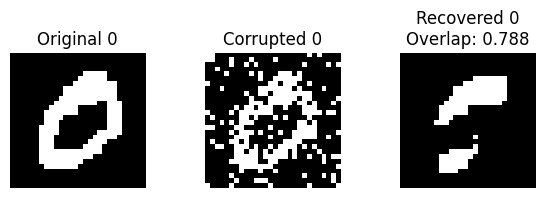

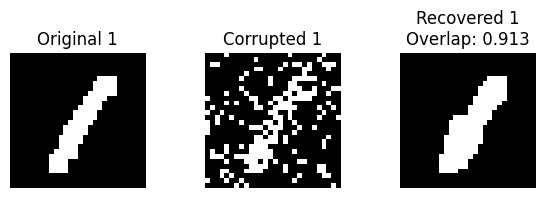

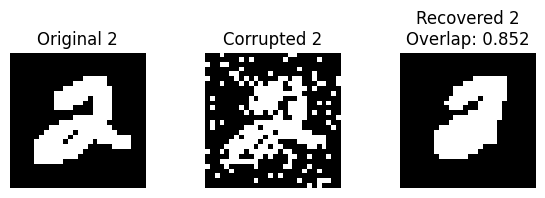

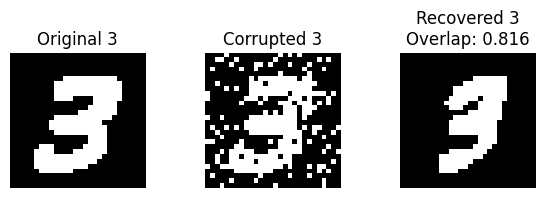

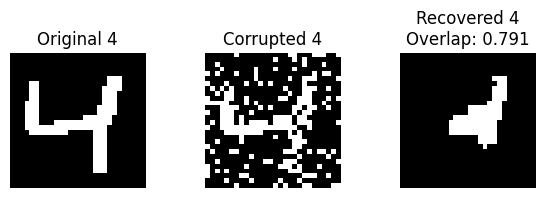

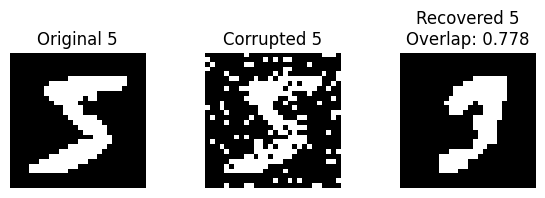

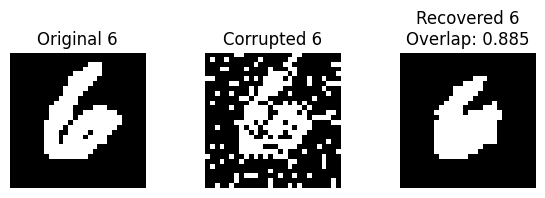

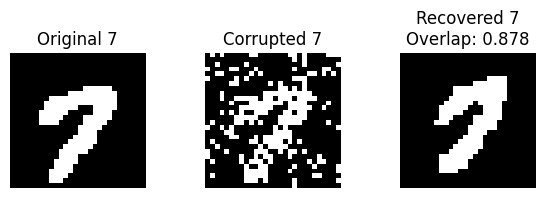

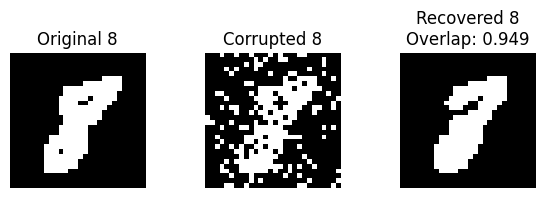

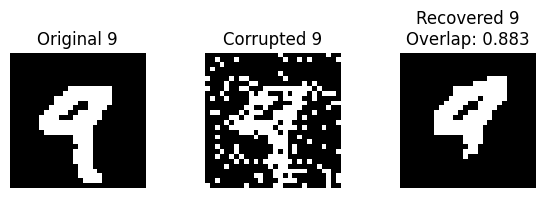

Interference for resolution (28, 28): 0.6093537414965984


In [12]:
# first we generate the patterns:
patterns = get_mnist_patterns(scale = 1)

# corrupting with a noise level of 1-q
q = 0.85
corrupted = corrupt_patterns(patterns, q)

# generating the HopfieldModel and correcting the corrupted patterns
model = HopfieldModelnD(patterns, update_method='synchronous', learning_rule='local', 
                        R=4, verbose=True)
recovered = model.correct_patterns(corrupted, temperature=1e-3, alpha=1e-6, 
                                   schedule = 'logarithmic', max_iter=300) #here if we do not select montecarlo temperature and alpha means nothing

# Assuming 'patterns', 'corrupted', 'recovered' are defined and 'model' is your Hopfield model.
plot_all_results(patterns, corrupted, recovered, model=model,filepath='plots/mnist_grid_best.png',figsize=(6,2))
print(f'Interference for resolution {patterns[0].shape}: {model.memory_interference()}')

---

Then, we tested an alternative initialization rule to evaluate the overlap and overall performance of a suboptimal model. As expected, with this less effective rule the network struggles to differentiate between the patterns as clearly as it did with the original initialization—even when the resolution is doubled (though the amount of information remains the same).

---

Converged after 7 iterations
Converged after 8 iterations
Converged after 6 iterations
Converged after 9 iterations
Converged after 10 iterations
Converged after 11 iterations
Converged after 9 iterations
Converged after 6 iterations
Converged after 10 iterations
Converged after 8 iterations


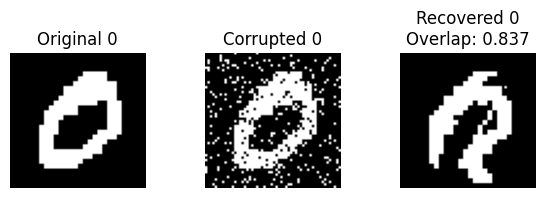

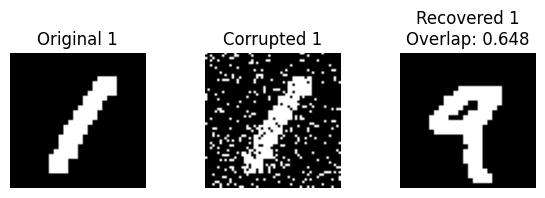

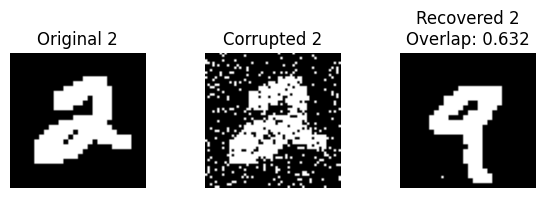

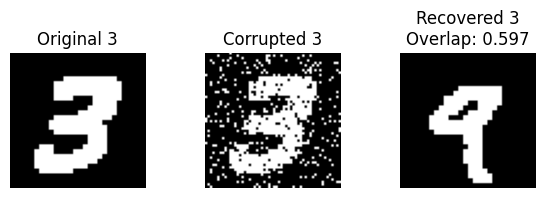

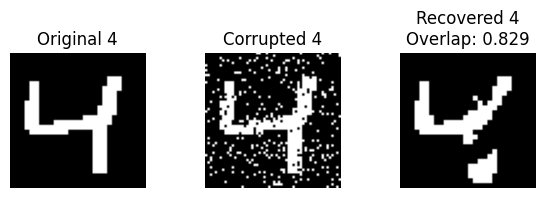

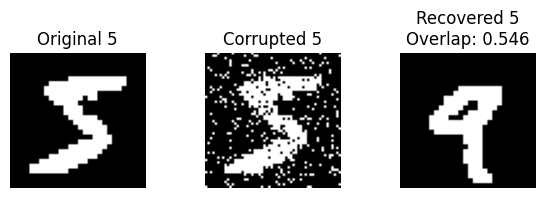

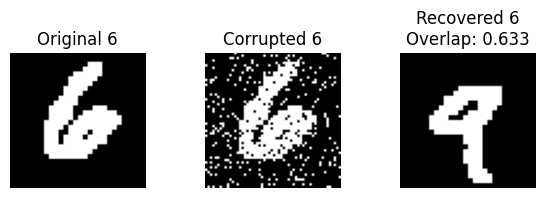

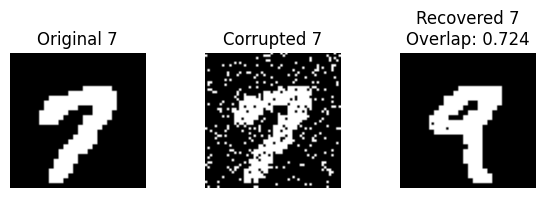

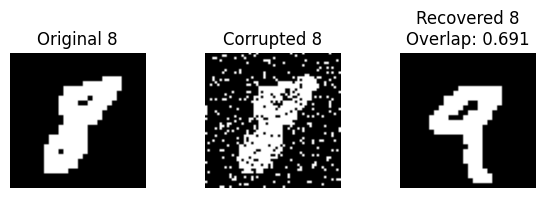

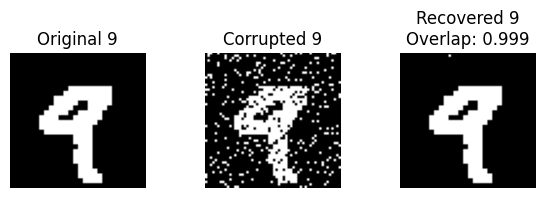

Interference for resolution (56, 56): 0.6093537414965984


In [13]:
# first we generate the patterns:
patterns = get_mnist_patterns(scale = 2)

# corrupting with a noise level of 1-q
q = 0.9
corrupted = corrupt_patterns(patterns, q)

# generating the HopfieldModel and correcting the corrupted patterns
model = HopfieldModelnD(patterns, update_method='montecarlo', learning_rule='turkey', 
                        R=4, verbose=True)
recovered = model.correct_patterns(corrupted, temperature=1e-3, alpha=1e-6, 
                                   schedule = 'logarithmic', max_iter=300) #here if we do not select montecarlo temperature and alpha means nothing

# Assuming 'patterns', 'corrupted', 'recovered' are defined and 'model' is your Hopfield model.
plot_all_results(patterns, corrupted, recovered, model=model, filepath='mnist_scale2_q08_best_turkey.png',figsize=(6,2))
print(f'Interference for resolution {patterns[0].shape}: {model.memory_interference()}')

Some observations: the overlap is perfect for only one of the digits; for the others, although the overlap remains relatively high, the recovered images bear little resemblance to the originals. This effect is likely due to strong interference between highly correlated patterns. In fact, the overlap metric does not fall much below the interference level, suggesting that it may not be sufficient in cases of high correlation.


---

## Temperature Study
Now, we analyze the efficiency of the three types of temperature decay, also known as learning rates in machine learning terminology, using both the MNIST dataset and randomly generated 2D images. Keeping $q$, the dimensions, and the number of patterns fixed, we evaluate how the Monte Carlo + local method performs over a temperature range from $10^{-3}$ to $5$ and an $\alpha$ range from $10^{-7}$ to $10^{-1}$.

For each combination of $T$ and $\alpha$, we determine which learning rule yields the highest average overlap. A simple histogram will then reveal which method is the most effective.This analysis was conducted for both the MNIST dataset and 2D random patterns.

---

### MNIST Patterns 




In [14]:
patterns = get_mnist_patterns(scale = 1)

# Define the parameter grid.
param_grid = {
    'q': 0.75,#np.linspace(0, 1, 101),             # corruption levels
    'n_patterns': len(patterns),          # use number of patterns already loaded or do a np.linspace if you generate internally (only random)
    'dim': [patterns[0].shape],               # dimension must match the provided patterns
    'T': np.logspace(-3, np.log10(5), num=1),
    'alpha': np.logspace(-7,-1, num=1),
    'schedule': ['exponential','classic','logarithmic'],
    'R': 4,#[1,2,3,4,5,6,7],
    'update_method': ['montecarlo'],
    'learning_rule': ['local']
}

# Execute grid search, passing the pre-loaded patterns.
df_results, best_model_params = grid_search_parallel(
    param_grid,
    save_path=None,#'grid_search_results/mnist_grid_search_montecarlo_q75_final_2.csv',
    best_metric_key='avg_overlap',
    n_jobs=8,
    patterns=patterns  # Pass the external patterns
    # You can also pass a custom corruption function: corruption_function=your_custom_function
)

Grid Search Progress: 100%|██████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.07s/it]


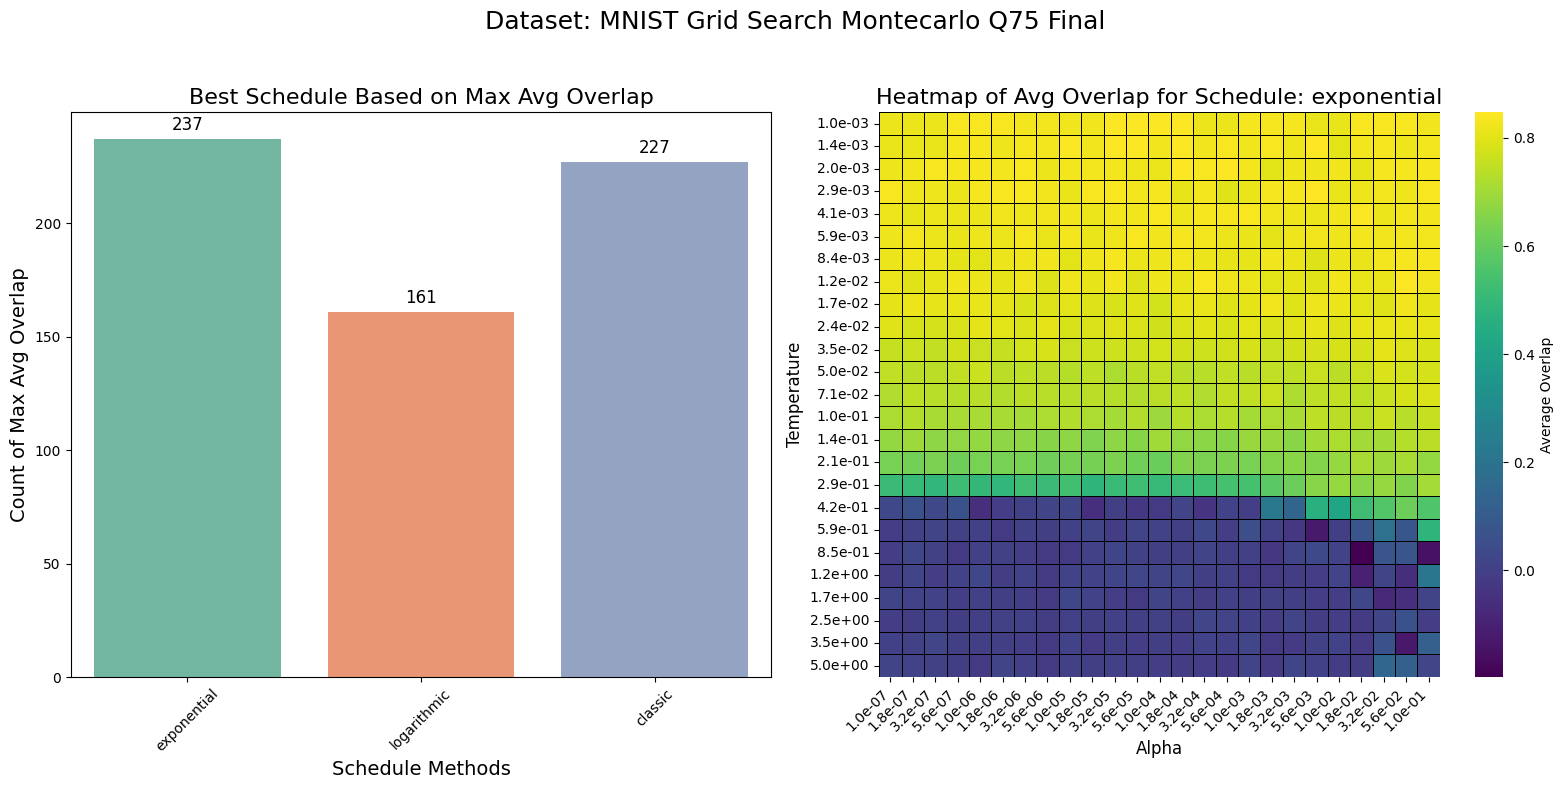

In [31]:
# Read the dataset
df = pd.read_csv("grid_search_results/mnist_grid_search_montecarlo_q75_final_2.csv")

# ------------------------------
# Left Plot: Histogram of winning schedules
# ------------------------------

# Initialize list to store winning schedule per group of 3 rows
schedule_winners = []

# Iterate over dataframe in groups of 3 rows
for i in range(0, len(df), 3):
    subset = df.iloc[i:i+3]
    # Get the schedule with maximum avg_overlap in the group
    winner = subset.loc[subset['avg_overlap'].idxmax(), 'schedule']
    schedule_winners.append(winner)

# Create dataframe from schedule winners
df_winners = pd.DataFrame(schedule_winners, columns=['schedule'])

# ------------------------------
# Right Plot: Heatmap for a selected schedule
# ------------------------------

# Create a copy for heatmap and sort it (by temperature and n_patterns)
df_heatmap = df.sort_values(by=['temperature', 'n_patterns']).reset_index(drop=True)

# Select a schedule to plot (here we choose the first unique schedule)
selected_schedule = df_heatmap['schedule'].unique()[0]
subset_heatmap = df_heatmap[df_heatmap['schedule'] == selected_schedule]

# Create pivot table for heatmap: rows = temperature, columns = alpha, values = avg_overlap
heatmap_data = subset_heatmap.pivot(index='temperature', columns='alpha', values='avg_overlap')

# ------------------------------
# Create a figure with two subplots side by side
# ------------------------------

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Dataset: MNIST Grid Search Montecarlo Q75 Final", fontsize=18)

# Left subplot: Histogram
sns.countplot(data=df_winners, x='schedule', hue='schedule', palette='Set2', ax=axes[0], legend=False)
axes[0].set_xlabel('Schedule Methods', fontsize=14)
axes[0].set_ylabel('Count of Max Avg Overlap', fontsize=14)
axes[0].set_title('Best Schedule Based on Max Avg Overlap', fontsize=16)
axes[0].tick_params(axis='x', rotation=45)


# Annotate bar heights
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{int(height)}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', fontsize=12,
                     color='black', xytext=(0, 10),
                     textcoords='offset points')

# Right subplot: Heatmap
sns.heatmap(heatmap_data.astype(float),
            cmap='viridis',
            annot=False,
            cbar_kws={'label': 'Average Overlap'},
            linewidths=0.5,
            linecolor='black',
            ax=axes[1])
axes[1].set_title(f"Heatmap of Avg Overlap for Schedule: {selected_schedule}", fontsize=16)
axes[1].set_xlabel('Alpha', fontsize=12)
axes[1].set_ylabel('Temperature', fontsize=12)
axes[1].tick_params(axis='both', labelsize=10)

# ------------------------------
# Format axis labels in scientific notation
# ------------------------------

# Convert axis values to scientific notation
x_labels = [f"{x:.1e}" for x in heatmap_data.columns]  # Alpha
y_labels = [f"{y:.1e}" for y in heatmap_data.index]    # Temperature

# Set formatted labels
axes[1].set_xticklabels(x_labels, rotation=45, ha="right")
axes[1].set_yticklabels(y_labels, rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('plots/mnist_montecarlo_search.png')
plt.show()


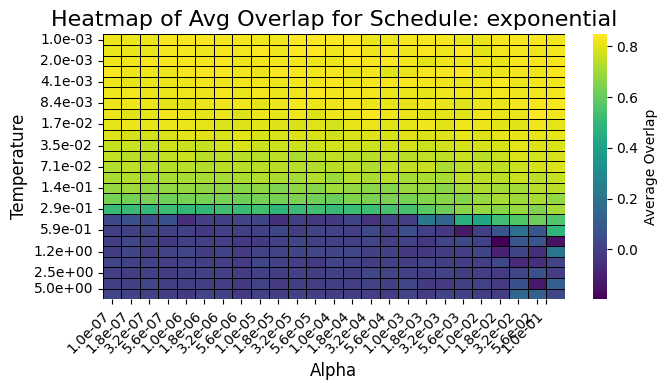

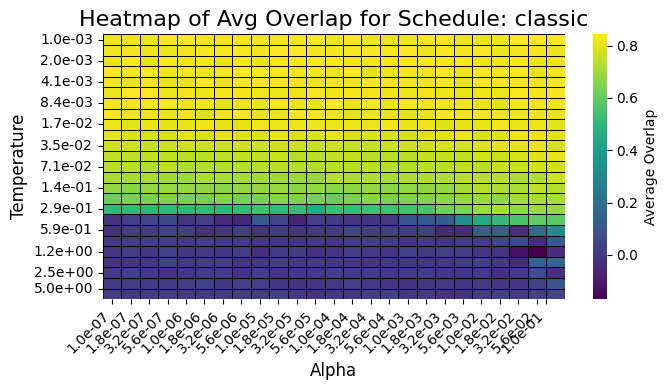

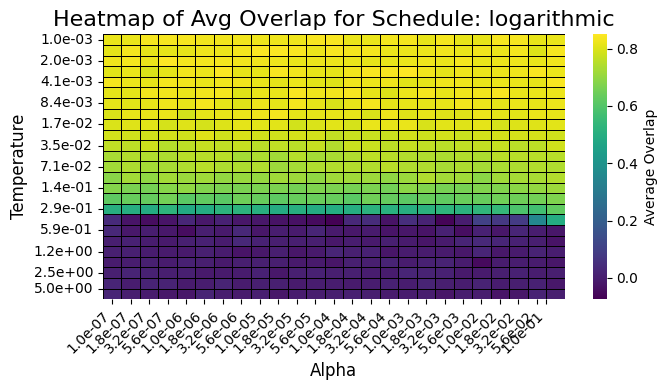

In [30]:
df = pd.read_csv("grid_search_results/mnist_grid_search_montecarlo_q75_final_2.csv")

# Ensure the dataframe is correctly sorted (e.g., by 'temperature' or another parameter)
df = df.sort_values(by=['temperature', 'n_patterns']).reset_index(drop=True)

# Create a separate plot for each type of 'schedule'
schedules = df['schedule'].unique()

# Generate heatmaps for each 'schedule'
for schedule in schedules:
    # Filter the dataframe for the given schedule value
    subset = df[df['schedule'] == schedule]

    # Create the pivot table for the heatmap (y: temperature, x: alpha, color: avg_overlap)
    heatmap_data = subset.pivot(index='temperature', columns='alpha', values='avg_overlap')

    plt.figure(figsize=(7, 4))

    # Create the heatmap
    ax = sns.heatmap(heatmap_data.astype(float), cmap='viridis', annot=False,
                     cbar_kws={'label': 'Average Overlap'}, linewidths=0.5, linecolor='black')

    
    plt.title(f"Heatmap of Avg Overlap for Schedule: {schedule}", fontsize=16)
    plt.xlabel('Alpha', fontsize=12)  
    plt.ylabel('Temperature', fontsize=12)  

      # Convert axis values to scientific notation
    x_ticks = ax.get_xticks()
    y_ticks = ax.get_yticks()
    
    # Ensure tick values match the data range
    x_ticks = np.clip(x_ticks, 0, len(heatmap_data.columns) - 1)
    y_ticks = np.clip(y_ticks, 0, len(heatmap_data.index) - 1)

    x_labels = [f"{heatmap_data.columns[int(i)]:.1e}" for i in x_ticks]  # Alpha
    y_labels = [f"{heatmap_data.index[int(i)]:.1e}" for i in y_ticks]    # Temperature

    # Set formatted labels
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels, fontsize=10, rotation=45, ha="right")

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels, fontsize=10, rotation=0)
    plt.grid(False) 
    plt.tight_layout()
    plt.show()

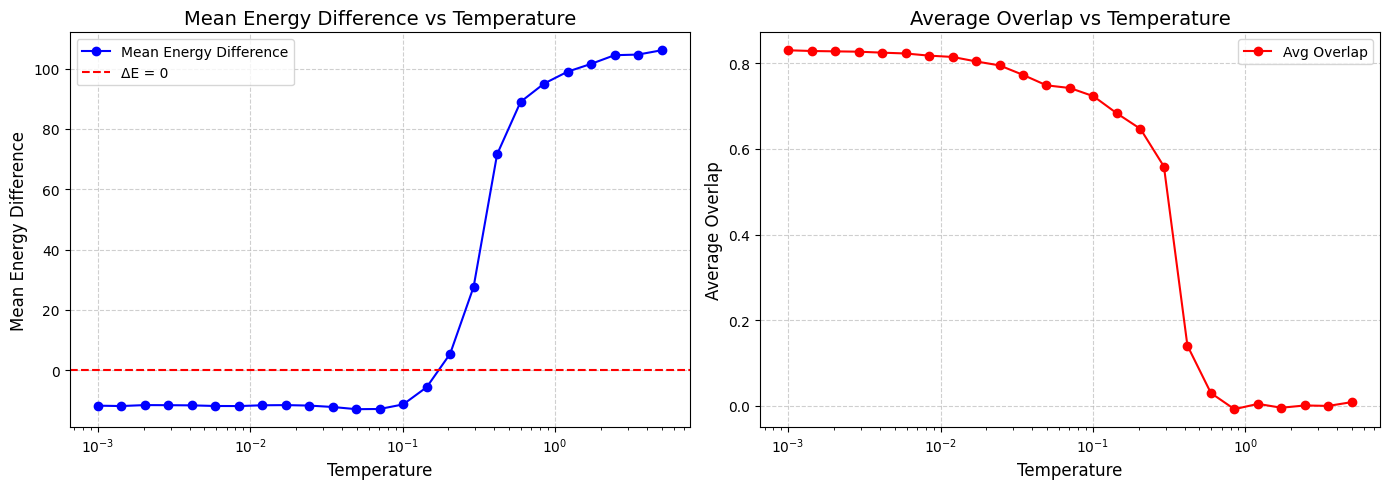

In [4]:
import pandas as pd
df = pd.read_csv("grid_search_results/mnist_grid_search_montecarlo_q75_final_2.csv")  

df_exp = df[df['schedule'] == 'exponential']

df_grouped = df_exp.groupby('temperature').agg({'alpha': 'mean', 'energy_diff': 'mean', 'avg_overlap': 'mean'}).reset_index()


fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

axes[0].plot(df_grouped['temperature'], df_grouped['energy_diff'], marker='o', linestyle='-', color='b', label='Mean Energy Difference')
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=1.5, label='ΔE = 0')  # Linea tratteggiata a ΔE = 0
axes[0].set_xlabel("Temperature", fontsize=12)
axes[0].set_ylabel("Mean Energy Difference", fontsize=12)
axes[0].set_title("Mean Energy Difference vs Temperature", fontsize=14)
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)


axes[1].plot(df_grouped['temperature'], df_grouped['avg_overlap'], marker='o', linestyle='-', color='r', label="Avg Overlap")
axes[1].set_xlabel("Temperature", fontsize=12)
axes[1].set_ylabel("Average Overlap", fontsize=12)
axes[1].set_title("Average Overlap vs Temperature", fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

for ax in axes:
    ax.set_xscale('log')

plt.savefig('plots/fase_transition.png')
plt.tight_layout()
plt.show()

As we could guess from the heatmaps and directly see from the plot above we have a clear phase transition at $T\simeq 0.35$ as the model should have predicted. This is consistent in both the Energy difference plot and the Overlap plot.

### 2D Random Patterns

In [20]:
#patterns = get_mnist_patterns(scale = 1)

# Define the parameter grid.
param_grid = {
    'q': 0.75,#np.linspace(0, 1, 101),             # corruption levels
    'n_patterns': 10,#len(patterns),          # use number of patterns already loaded or do a np.linspace if you generate internally (only random)
    'dim': [(10,10)],#[patterns[0].shape],               # dimension must match the provided patterns
    'T': np.logspace(-3, np.log10(5), num=1),
    'alpha': np.logspace(-7,-1, num=1),
    'schedule': ['exponential','classic','logarithmic'],
    'R': None,#[1,2,3,4,5,6,7],
    'update_method': ['montecarlo'],
    'learning_rule': ['turkey']
}

# Execute grid search, passing the pre-loaded patterns.
df_results, best_model_params = grid_search_parallel(
    param_grid,
    save_path=None,#'grid_search_results/random_grid_search_montecarlo_q75_final_2.csv',
    best_metric_key='avg_overlap',
    n_jobs=8,
    patterns=patterns  # Pass the external patterns
    # You can also pass a custom corruption function: corruption_function=your_custom_function
)

Grid Search Progress: 100%|███████████████████████| 3/3 [00:01<00:00,  2.38it/s]


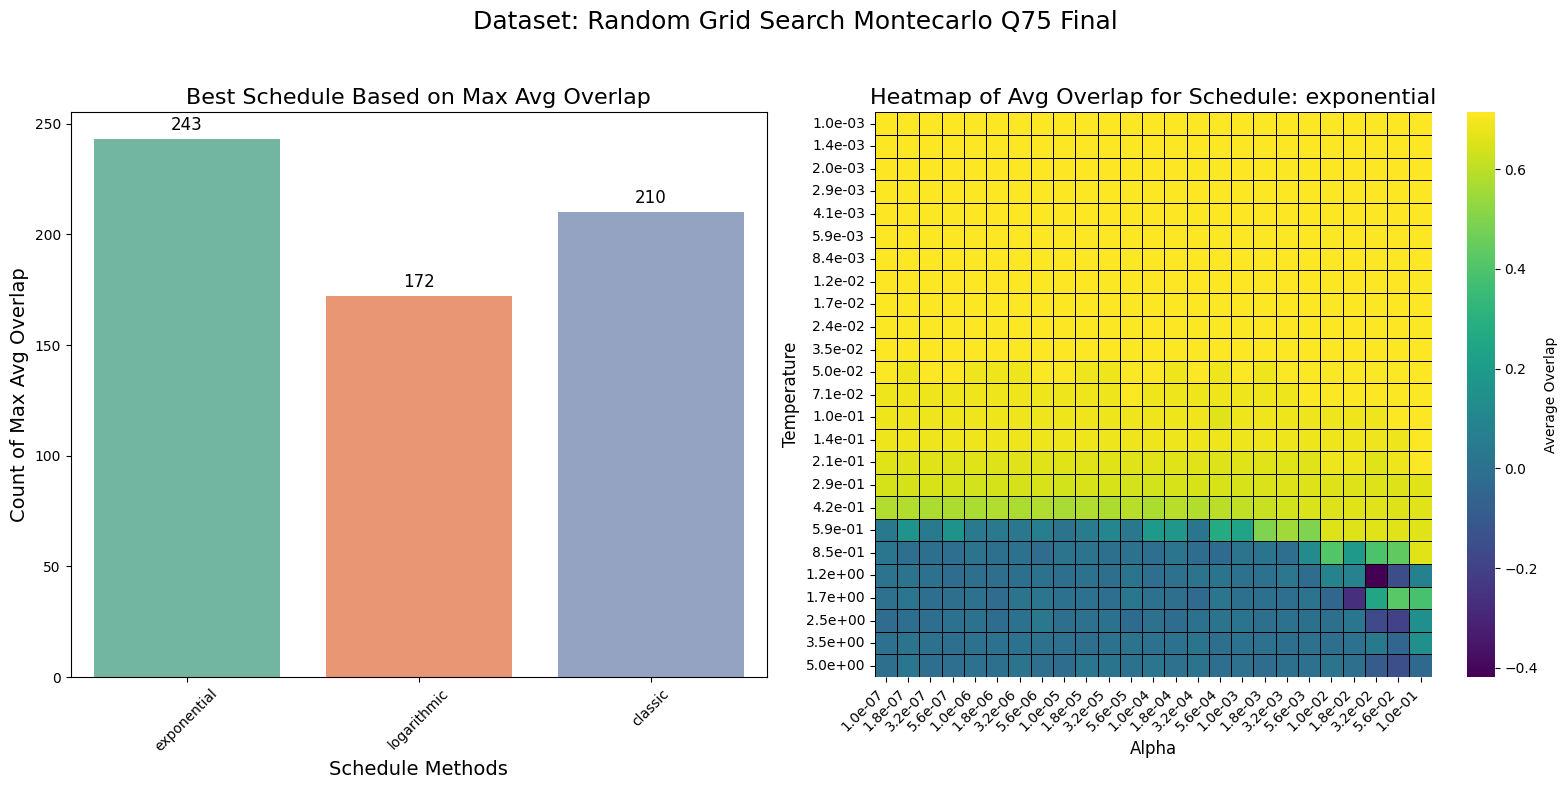

In [28]:
# Read the dataset
df = pd.read_csv("grid_search_results/random_grid_search_montecarlo_q75_final_2.csv")

# ------------------------------
# Left Plot: Histogram of winning schedules
# ------------------------------

# Initialize list to store winning schedule per group of 3 rows
schedule_winners = []

# Iterate over dataframe in groups of 3 rows
for i in range(0, len(df), 3):
    subset = df.iloc[i:i+3]
    # Get the schedule with maximum avg_overlap in the group
    winner = subset.loc[subset['avg_overlap'].idxmax(), 'schedule']
    schedule_winners.append(winner)

# Create dataframe from schedule winners
df_winners = pd.DataFrame(schedule_winners, columns=['schedule'])

# ------------------------------
# Right Plot: Heatmap for a selected schedule
# ------------------------------

# Create a copy for heatmap and sort it (by temperature and n_patterns)
df_heatmap = df.sort_values(by=['temperature', 'n_patterns']).reset_index(drop=True)

# Select a schedule to plot (here we choose the first unique schedule)
selected_schedule = df_heatmap['schedule'].unique()[0]
subset_heatmap = df_heatmap[df_heatmap['schedule'] == selected_schedule]

# Create pivot table for heatmap: rows = temperature, columns = alpha, values = avg_overlap
heatmap_data = subset_heatmap.pivot(index='temperature', columns='alpha', values='avg_overlap')

# ------------------------------
# Create a figure with two subplots side by side
# ------------------------------

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Dataset: Random Grid Search Montecarlo Q75 Final", fontsize=18)

# Left subplot: Histogram
sns.countplot(data=df_winners, x='schedule', hue='schedule', palette='Set2', ax=axes[0], legend=False)
axes[0].set_xlabel('Schedule Methods', fontsize=14)
axes[0].set_ylabel('Count of Max Avg Overlap', fontsize=14)
axes[0].set_title('Best Schedule Based on Max Avg Overlap', fontsize=16)
axes[0].tick_params(axis='x', rotation=45)


# Annotate bar heights
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{int(height)}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', fontsize=12,
                     color='black', xytext=(0, 10),
                     textcoords='offset points')

# Right subplot: Heatmap
sns.heatmap(heatmap_data.astype(float),
            cmap='viridis',
            annot=False,
            cbar_kws={'label': 'Average Overlap'},
            linewidths=0.5,
            linecolor='black',
            ax=axes[1])
axes[1].set_title(f"Heatmap of Avg Overlap for Schedule: {selected_schedule}", fontsize=16)
axes[1].set_xlabel('Alpha', fontsize=12)
axes[1].set_ylabel('Temperature', fontsize=12)
axes[1].tick_params(axis='both', labelsize=10)

# ------------------------------
# Format axis labels in scientific notation
# ------------------------------

# Convert axis values to scientific notation
x_labels = [f"{x:.1e}" for x in heatmap_data.columns]  # Alpha
y_labels = [f"{y:.1e}" for y in heatmap_data.index]    # Temperature

# Set formatted labels
axes[1].set_xticklabels(x_labels, rotation=45, ha="right")
axes[1].set_yticklabels(y_labels, rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('plots/random_montecarlo_search.png')
plt.show()


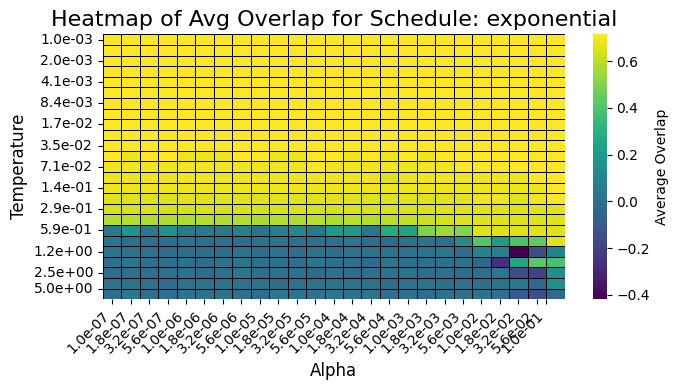

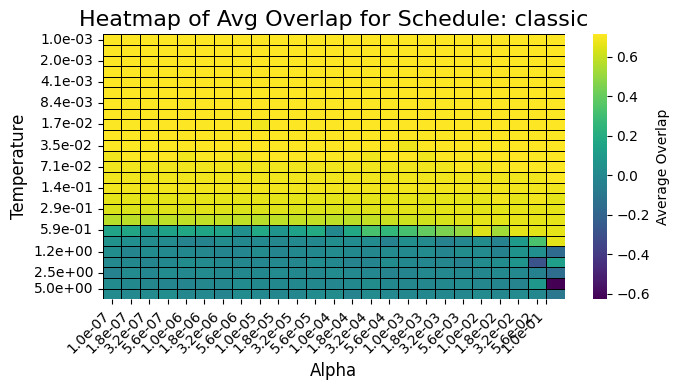

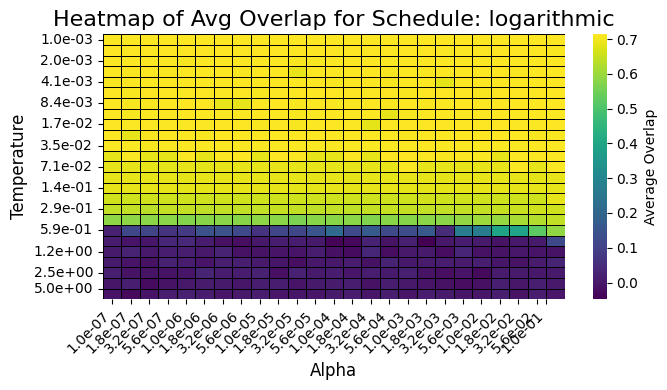

In [27]:
df = pd.read_csv("grid_search_results/random_grid_search_montecarlo_q75_final_2.csv")

# Ensure the dataframe is correctly sorted (e.g., by 'temperature' or another parameter)
df = df.sort_values(by=['temperature', 'n_patterns']).reset_index(drop=True)

# Round the avg_overlap values to 5 decimal places
df['avg_overlap'] = df['avg_overlap'].round(5)

# Create a separate plot for each type of 'schedule'
schedules = df['schedule'].unique()

# Generate heatmaps for each 'schedule'
for schedule in schedules:
    # Filter the dataframe for the given schedule value
    subset = df[df['schedule'] == schedule]

    # Create the pivot table for the heatmap (y: temperature, x: alpha, color: avg_overlap)
    heatmap_data = subset.pivot(index='temperature', columns='alpha', values='avg_overlap')
  
    plt.figure(figsize=(7, 4))

    # Create the heatmap
    ax = sns.heatmap(heatmap_data.astype(float), cmap='viridis', annot=False,
                     cbar_kws={'label': 'Average Overlap'}, linewidths=0.5, linecolor='black')

    
    plt.title(f"Heatmap of Avg Overlap for Schedule: {schedule}", fontsize=16)
    plt.xlabel('Alpha', fontsize=12)  
    plt.ylabel('Temperature', fontsize=12)  
    
       # Convert axis values to scientific notation
    x_ticks = ax.get_xticks()
    y_ticks = ax.get_yticks()
    
    # Ensure tick values match the data range
    x_ticks = np.clip(x_ticks, 0, len(heatmap_data.columns) - 1)
    y_ticks = np.clip(y_ticks, 0, len(heatmap_data.index) - 1)

    x_labels = [f"{heatmap_data.columns[int(i)]:.1e}" for i in x_ticks]  # Alpha
    y_labels = [f"{heatmap_data.index[int(i)]:.1e}" for i in y_ticks]    # Temperature

    # Set formatted labels
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels, fontsize=10, rotation=45, ha="right")

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels, fontsize=10, rotation=0)  

    plt.grid(False) 
    plt.tight_layout()
    plt.show()

---

As we can see for both patterns we cannot differentiate the temperature decays in the heatmaps because the performance is very similar. However we can track the count of the best performer for every $T_0$ and $\alpha$ combination. In either of those we clearly have two winners: the exponential and the classic (or polynomial) rate, whereas the logarithmic schedule is less performant independently of the pattern type (random or correlated like mnist).


---

## Conclusion

We explored the Hopfield model and some of its applications, especially in the case of memorizing and recovering 2D patterns. 
First we tried it on different patterns, being randomly generated and a collection of images converted in 2D binary patterns; we found the best model in terms of learning rule and uptade method for each set of patterns. Then we did a more sistematic analysis explorying $q, N, P$ dimensions; the same for $T$, $\alpha$ under three temperature decay rules (exponential, logarithmic and polynomial). We found that the exponential one gives better results in term of overlap averages.

Finally, as we expected, cooling down the system, a phase transition emerges

# **Future Work**  
Possible directions for future research include:

- **Capacity and Sparsity**:  
Theoretical studies (Tsodyks & Feigel’man, 1988) suggest that the storage capacity of Hopfield networks can be significantly enhanced by using sparse patterns. A sparse pattern is one in which only a small fraction of neurons is active (assigned a value of $ +1 $) while the majority remains inactive (assigned $ -1 $). The average activity $ a $ of a pattern is defined as:  

$$
a = \frac{1}{N} \sum_{i=1}^{N} \langle \xi_i^\mu \rangle
$$

When $ a \ll 1 $, interference between stored patterns is reduced, potentially increasing the capacity to approximately $ P_c \approx \frac{0.27N}{a} $. An empirical study varying pattern sparsity would provide valuable insights into this theoretical prediction.

- **Applications to Pattern Recognition**:  
In our study, we focused on how the network recognizes digits from the MNIST dataset. A promising extension would be to explore whether the Hopfield network can accurately distinguish among a variety of handwritten patterns and consistently associate them with the correct digits. While more advanced algorithms achieve significantly better performance in this task, investigating the performance of classical associative memory models in this context can still offer valuable insights into their fundamental capabilities and limitations.

---